In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [106]:
df = pd.read_csv('datasets/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [107]:
df.size

140933

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [109]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df.isna().sum() * 100 / len(df)  # percentage of missing values

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

### Total Number of App Titles Contain Astrology

In [111]:
x = df.loc[df["App"].str.contains("astrology", case=False)]
x

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1570,Horoscopes – Daily Zodiac Horoscope and Astrology,LIFESTYLE,4.6,161143,11M,"10,000,000+",Free,0,Everyone 10+,Lifestyle,"June 25, 2018",5.2.4(881),4.0.3 and up
1592,သိင်္ Astrology - Min Thein Kha BayDin,LIFESTYLE,4.7,2225,15M,"100,000+",Free,0,Everyone,Lifestyle,"July 26, 2018",4.2.1,4.0.3 and up
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### Find Average App Rating

In [112]:
# impute the missing values with median
df["Rating"].fillna(df["Rating"].median(), inplace=True)


C:\Users\Chamika Jayasinghe\AppData\Local\Temp\ipykernel_25436\2378619346.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Rating"].fillna(df["Rating"].median(), inplace=True)


In [113]:
df["Rating"].mean()


4.2078406051102295

### Find Total Number of Unique Category

In [114]:
df["Category"].unique()


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [115]:
df["Category"].nunique()

34

### Which Category has The Highest Average Rating?

In [116]:
# df.groupby("Category")["Rating"].mean().reset_index()
# first check whether the rating values fall within the range of 0 to 5
df["Rating"].describe()

count    10841.000000
mean         4.207841
std          0.500893
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max         19.000000
Name: Rating, dtype: float64

In [117]:
df.loc[df["Rating"] > 5]    

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [118]:
df.drop(df[df["Rating"] > 5].index, inplace=True)


In [119]:
#  now we can group by category and calculate the mean of the ratings
x = df.groupby("Category")["Rating"].mean().reset_index()       

x.sort_values(by="Rating", ascending=False).head(5)

,Category,Rating
10,EVENTS,4.395313
8,EDUCATION,4.388462
0,ART_AND_DESIGN,4.355385
3,BOOKS_AND_REFERENCE,4.335498
23,PERSONALIZATION,4.328827


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FAMILY'),
  Text(12, 0, 'FINANCE'),
  Text(13, 0, 'FOOD_AND_DRINK'),
  Text(14, 0, 'GAME'),
  Text(15, 0, 'HEALTH_AND_FITNESS'),
  Text(16, 0, 'HOUSE_AND_HOME'),
  Text(17, 0, 'LIBRARIES_AND_DEMO'),
  Text(18, 0, 'LIFESTYLE'),
  Text(19, 0, 'MAPS_AND_NAVIGATION'),
  Text(20, 0, 'MEDICAL'),
  Text(21, 0, 'NEWS_AND_MAGAZINES'),
  Text(22, 0, 'PARENTING'),
  Text(23, 0, 'PERSONALIZATION'),
  Text(24, 0, 'PHOTOGRAPHY'),
  Text(25, 0, 'PRODUCTIVITY'),
  Text(26, 0, 'SHOPPING'),
  

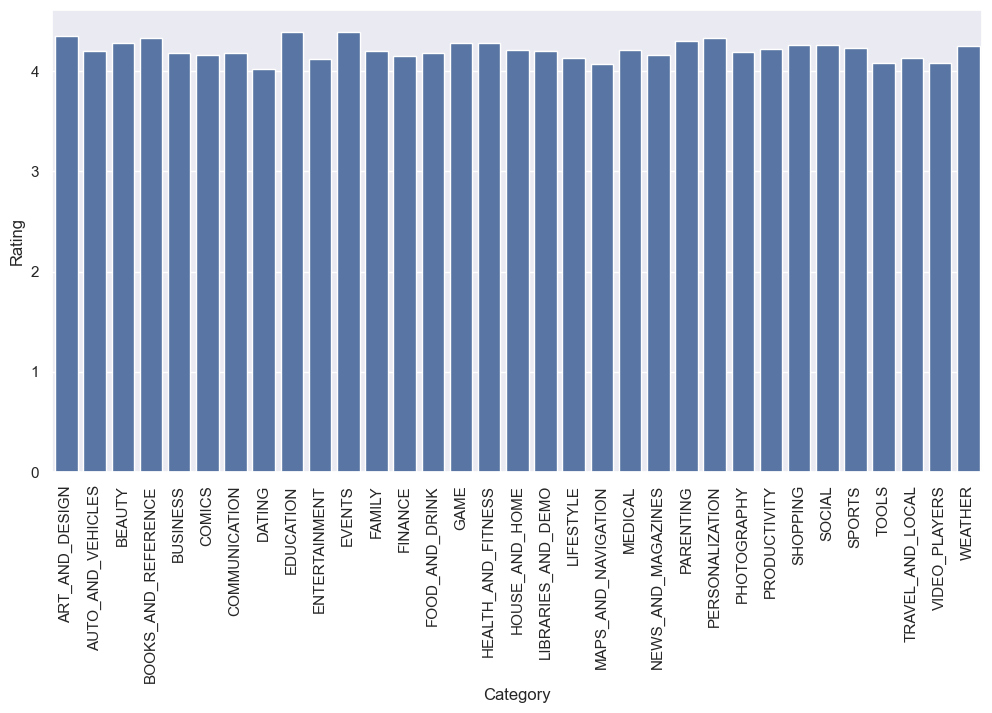

In [120]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

sns.barplot(x="Category", y="Rating", data=x)
plt.xticks(rotation=90)   

### Find Total Number of App having 5 Star Rating

In [121]:
x = df.loc[df["Rating"] == 5]
len(x)

274

### Find Average Value of Reviews

In [122]:
# data type of the "Reviews" column is object, we need to convert it before finding the mean 
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce")   
df["Reviews"].mean()


444152.89603321033

###  Find Total Number of Free and Paid Apps

In [123]:
df["Type"].value_counts()

Type
Free    10039
Paid      800
Name: count, dtype: int64

### Which app has the max reviews?

In [124]:
df.sort_values(by="Reviews", ascending=False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


### Avg rating for free and paid apps

In [125]:
df.groupby("Type")["Rating"].mean()

Type
Free    4.201165
Paid    4.273000
Name: Rating, dtype: float64

### App with most number of installs

In [126]:
df["Installs"] = pd.to_numeric(df["Installs"].str.replace("+", "").str.replace(",", ""), errors="coerce")


In [130]:
df.sort_values(by="Installs", ascending=False).head(10)  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3896,Subway Surfers,GAME,4.5,27711703,76M,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
3523,Google Drive,PRODUCTIVITY,4.4,2731211,Varies with device,1000000000,Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3565,Google Drive,PRODUCTIVITY,4.4,2731211,Varies with device,1000000000,Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
2884,Google Photos,PHOTOGRAPHY,4.5,10859051,Varies with device,1000000000,Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
2853,Google Photos,PHOTOGRAPHY,4.5,10858538,Varies with device,1000000000,Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
4234,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,Varies with device,1000000000,Free,0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device
